In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('tweets.csv')
data = data.drop(data.columns[0], axis=1)
data.head()

,Tweets,length,ID,Date,Source,Likes,RTs
0,Will be interviewed by @MariaBartiromo on @Fox...,139,1122485588580605953,2019-04-28 12:59:53,Twitter for iPhone,48930,11305
1,RT @AbeShinzo: 昨日の首脳会談、4人だけの夕食会、そして本日のゴルフと、トラン...,140,1122352809792475136,2019-04-28 04:12:16,Twitter for iPhone,0,11061
2,"....for the more traditional, but not very bri...",139,1122337243744497664,2019-04-28 03:10:25,Twitter for iPhone,80807,17451
3,"The Democratic National Committee, sometimes r...",140,1122337240330297344,2019-04-28 03:10:24,Twitter for iPhone,80348,18158
4,....Ever since Andrew came to my office to ask...,139,1122334000519868416,2019-04-28 02:57:32,Twitter for iPhone,78168,19752


# visualization and statistic

In [3]:
# show the details of dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 7 columns):
Tweets    3348 non-null object
length    3348 non-null int64
ID        3348 non-null int64
Date      3348 non-null object
Source    3348 non-null object
Likes     3348 non-null int64
RTs       3348 non-null int64
dtypes: int64(4), object(3)
memory usage: 183.2+ KB
None


In [4]:
#  we obtain all possible sources, and we find out not all tweets from the same device
# we print all source list
data['Source'].unique()

array(['Twitter for iPhone', 'Twitter Media Studio', 'Twitter for iPad',
       'Twitter Web Client'], dtype=object)

In [5]:
# use the nummerical data replace the devices name
# iphone => 0 Twitter Media Studio=>1 iPad =>2 Web Clientr=>3

labels, uniques = pd.factorize(data['Source'])
data['Source'] = labels
devices = data['Source'].groupby(data['Source']).count()
devices

Source
0    3298
1      44
2       5
3       1
Name: Source, dtype: int64

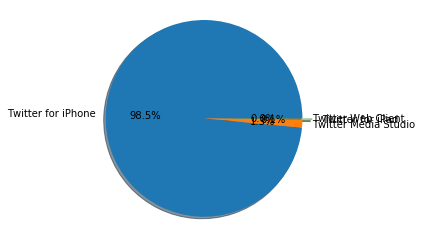

In [6]:
# pie chart
label = 'Twitter for iPhone', 'Twitter Media Studio', 'Twitter for iPad', 'Twitter Web Client'
sizes = devices/len(data)
explode = (0,0,0.1,0)
plt.pie(sizes, labels = label, autopct='%1.1f%%',
       shadow=True, labeldistance=1.1, startangle=0, pctdistance=0.6, explode=explode)
plt.axis('equal')
plt.show()

In [7]:
data[['length', 'Source', 'Likes', 'RTs']].describe()

,length,Source,Likes,RTs
count,3348.000000,3348.000000,3348.000000,3348.000000
mean,120.867682,0.017025,75372.204898,20268.729092
std,34.204513,0.146699,51237.206536,10418.061607
min,5.000000,0.000000,0.000000,968.000000
25%,110.000000,0.000000,46679.000000,12960.000000
50%,140.000000,0.000000,76204.000000,18680.500000
75%,140.000000,0.000000,103785.000000,25238.250000
max,152.000000,3.000000,496376.000000,116865.000000


Histogram

->length

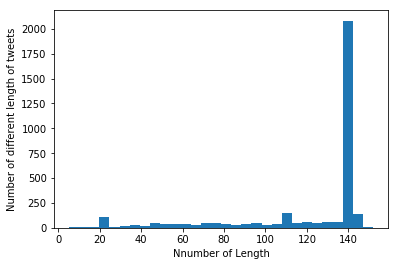

In [8]:
plt.hist(data['length'], bins=30)
plt.ylabel('Number of different length of tweets')
plt.xlabel('Nnumber of Length')
plt.show()

->Likes

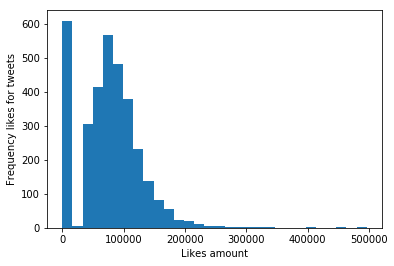

In [9]:
plt.hist(data['Likes'], bins = 30)
plt.ylabel('Frequency likes for tweets')
plt.xlabel('Likes amount')
plt.show()

In [10]:
data.where(data['Likes'] > 400000).dropna()['Tweets']

175                               https://t.co/222atp7wuB
467     No Collusion, No Obstruction, Complete and Tot...
469                       Good Morning, Have A Great Day!
1437                                     Merry Christmas!
Name: Tweets, dtype: object

Retweets

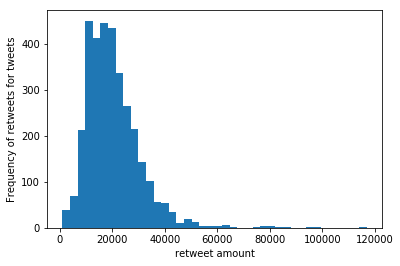

In [11]:
plt.hist(data['RTs'], bins = 40)
plt.ylabel('Frequency of retweets for tweets')
plt.xlabel('retweet amount')
plt.show()

In [12]:
data.where(data['RTs'] > 100000).dropna()['Tweets']

175    https://t.co/222atp7wuB
Name: Tweets, dtype: object

1.2 Time Series

In [13]:
timedata = data.copy()
timedata.index = pd.DatetimeIndex(timedata['Date'])
timedata.head()

,Tweets,length,ID,Date,Source,Likes,RTs
Date,,,,,,,
2019-04-28 12:59:53,Will be interviewed by @MariaBartiromo on @Fox...,139,1122485588580605953,2019-04-28 12:59:53,0,48930,11305
2019-04-28 04:12:16,RT @AbeShinzo: 昨日の首脳会談、4人だけの夕食会、そして本日のゴルフと、トラン...,140,1122352809792475136,2019-04-28 04:12:16,0,0,11061
2019-04-28 03:10:25,"....for the more traditional, but not very bri...",139,1122337243744497664,2019-04-28 03:10:25,0,80807,17451
2019-04-28 03:10:24,"The Democratic National Committee, sometimes r...",140,1122337240330297344,2019-04-28 03:10:24,0,80348,18158
2019-04-28 02:57:32,....Ever since Andrew came to my office to ask...,139,1122334000519868416,2019-04-28 02:57:32,0,78168,19752


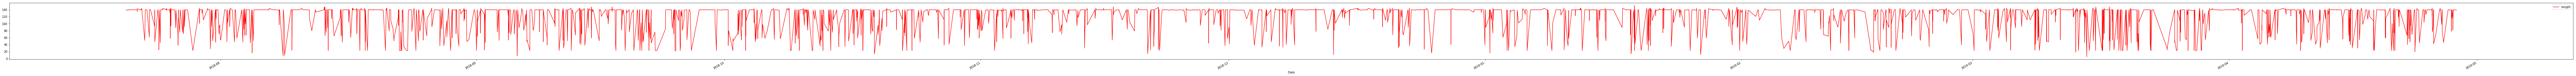

In [14]:
# plot the relation between particular time and length
timedata['length'].plot(figsize = (160,4), label = "length", color='r', legend=True)

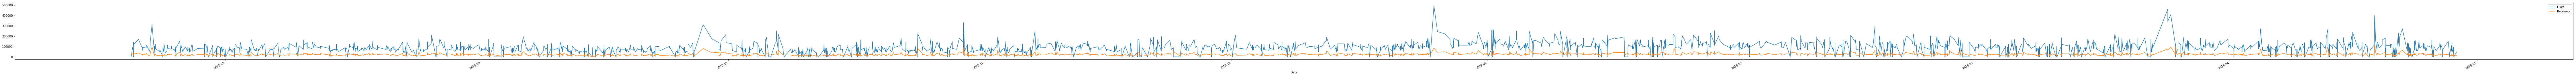

In [15]:
# show the relation between Likes RTs and particular time
timedata['Likes'].plot(figsize=(160,4), label="Likes", legend=True)
timedata['RTs'].plot(figsize=(160,4), label="Retweets", legend=True);

# sentiment analysis

In [1]:
from textblob import TextBlob
# reregular expression
import re

In [16]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [17]:
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [18]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])
# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,length,ID,Date,Source,Likes,RTs,SA
0,Will be interviewed by @MariaBartiromo on @Fox...,139,1122485588580605953,2019-04-28 12:59:53,0,48930,11305,0
1,RT @AbeShinzo: 昨日の首脳会談、4人だけの夕食会、そして本日のゴルフと、トラン...,140,1122352809792475136,2019-04-28 04:12:16,0,0,11061,0
2,"....for the more traditional, but not very bri...",139,1122337243744497664,2019-04-28 03:10:25,0,80807,17451,1
3,"The Democratic National Committee, sometimes r...",140,1122337240330297344,2019-04-28 03:10:24,0,80348,18158,1
4,....Ever since Andrew came to my office to ask...,139,1122334000519868416,2019-04-28 02:57:32,0,78168,19752,0
5,Thank you to brilliant and highly respected at...,140,1122333996451418112,2019-04-28 02:57:31,0,91977,21425,1
6,"Thank you Green Bay, Wisconsin! MAKE AMERICA G...",82,1122321330282561536,2019-04-28 02:07:11,0,77579,17468,1
7,"Beautiful #TrumpRally tonight in Green Bay, Wi...",138,1122319181221892096,2019-04-28 01:58:39,0,72477,18837,1
8,"Just arrived in Green Bay, Wisconsin for a #MA...",116,1122285823473401857,2019-04-27 23:46:06,0,49334,8959,-1
9,Sincerest THANK YOU to our great Border Patrol...,140,1122270956192272385,2019-04-27 22:47:01,0,132755,29592,1


In [19]:
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [20]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 52.210274790919954%
Percentage of neutral tweets: 30.04778972520908%
Percentage de negative tweets: 17.741935483870968%
